# Statistical analysis

Prerequesites:

- NumPy arrays
- Types
- matplotlib
- libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Statistics in an important tool in the analysis of chemical data. 
In this section, we will introduce some simple aspects of statistical analysis, focusing on how it can be used in interpret chemical measurements. 

Consider the measurement of the rate of some chemical reaction at 300 K. 
In order to be thorough, this measurement is completed multiple times (say five), and the values are given in the array below. 

In [2]:
# Some reaction rate data
k_300 = np.array([1.331, 1.313, 1.317, 1.323, 1.217])

If we assume that these values are some sample of an underlying normally distributed population, then we can describe the reaction rate with a mean and standard deviation. 

In [3]:
# Using numpy to calculate the mean and standard deviation
print("mean = {:.3f}, std_dev = {:.3f}".format(np.mean(k_300), np.std(k_300)))

mean = 1.300, std_dev = 0.042


Above, we added some phrases that may be unfamiliar to the typical chemist, so let clarify things a bit: 

- the **population** is all of elements for a set of data
- a **sample** is some subset of that data
- a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) common way that a population can be distributed (and is commonly used for measurement uncertainties)

An example of a normal distribution, that we think (if we assume that the samples we have are representative of the population) describes our measurements is shown below.

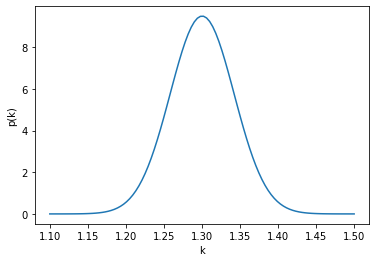

In [4]:
# Generate linearly spaced x values
x = np.linspace(1.1, 1.5, 100)
# Calculate the distribution probability at each x
y = stats.norm.pdf(x, loc=np.mean(k_300), scale=np.std(k_300))

# Plot
plt.plot(x, y)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.show()

This plot gives the probability that a particular value of $k$ would be measured. 
We can think of this as, if we measured infinite values of $k$ at 300 K the histogram of the results would look like this. 

To generate the plot above, we used a special type of object from the `scipy` library. 
This is called a [`rv_continuous`](https://docs.scipy.org/doc/scipy/reference/stats.html) object, in particular, we used the `norm` version (for normal). 

These objects allow for a vast amount of functionality associated with probability distributions. 
Let's take a closer look at the `stats.norm` object. 
This is a [class](./../basics/oop_intro.html), so can be defined as follows,

In [5]:
dist = stats.norm(loc=np.mean(k_300), scale=np.std(k_300))

With this object created, we can get the probability at a series of values `pdf(x)` or some number of random numbers from the distribution `rvs()` as shown below to create the histogram and plot over it. 

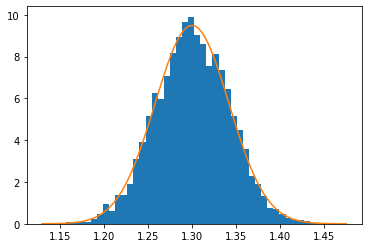

In [6]:
# Generate 5000 random numbers
values = dist.rvs(5000)
# Plot a histogram
plt.hist(values, density=True, bins=50)
# Use min and max of random numbers to create a range
x = np.linspace(values.min(), values.max(), 100)
# Plot the probability in that range
plt.plot(x, dist.pdf(x))
plt.show()

We can also fit some statistical function to a set of data, for example with the `norm` distribution.

In [7]:
stats.norm.fit(k_300)

(1.3002000000000002, 0.04203998097049992)

Notice that the values are the same as above, the mean and standard deviation.